{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}
 10000
     3
    32
    32
[torch.LongStorage of size 4]



10000	
 10000
     1
    32
    32
[torch.LongStorage of size 4]



Channel 1, Mean: 125.83175029297	


Channel 1, Standard Deviation: 63.143400842609	


Channel 2, Mean: 123.26066621094	


Channel 2, Standard Deviation: 62.369209019002	


Channel 3, Mean: 114.03068681641	


Channel 3, Standard Deviation: 66.965808411114	


# StochasticGradient: training	


# current error = 1.9767961460013	

# current error = 1.6786851391504	


# current error = 1.5500825842403	


# current error = 1.4726544192865	


# current error = 1.4127074077599	


# StochasticGradient: you have reached the maximum number of iterations	
# training error = 1.4127074077599	
horse	


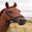

In [2]:
require 'image'
require 'nn'

--cargamos los datos
trainset = torch.load('cifar10-train.t7')
testset = torch.load('cifar10-test.t7')

--un diccionario que contine las clases 
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

--imprmimos para ver la cantidad de datos 
print(trainset)
print(#trainset.data)

--por diversion imprimimos una imagen

--itorch.image(trainset.data[100]) -- display the 100-th image in dataset
--print(classes[trainset.label[100]])

--**no entender esto**--

-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);


trainset.data = trainset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.

function trainset:size() 
    return self.data:size(1) 
end

print(trainset:size()) -- just to test

-----**------------------**-


redChannel = trainset.data[{ {}, {1}, {}, {}  }] -- this picks {all images, 1st channel, all vertical pixels, all horizontal pixels}
print(#redChannel)

--ahora hallaremos la media y la desviacion estandar para cada canal de las imagen
--para que nuestro dataset quede normalizado



mean = {} -- store the mean, to normalize the test set in the future
stdv  = {} -- store the standard-deviation for the future
for i=1,3 do -- over each image channel
    mean[i] = trainset.data[{ {}, {i}, {}, {}  }]:mean() -- mean estimation
    print('Channel ' .. i .. ', Mean: ' .. mean[i])
    trainset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction
    
    stdv[i] = trainset.data[{ {}, {i}, {}, {}  }]:std() -- std estimation
    print('Channel ' .. i .. ', Standard Deviation: ' .. stdv[i])
    trainset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end


---ahora crearemos nuestro Neural networks

net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.Linear(120, 84))
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems


--definimos nuestra loss function que este caso es ClassNllCriterion

criterion = nn.ClassNLLCriterion()

--el entrenamiento de la red haciendo por la funcion de StochasticGradient

trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001 ---ak defino mi learningRate
trainer.maxIteration = 5 -- just do 5 epochs of training.

trainer:train(trainset)


---hasta ak llevamos entrenando nuestra red neuronal con los dataset de entrenamiento
---ahora probaremos la eficiencia de este entrenamiento
print(classes[testset.label[100]])
itorch.image(testset.data[100])

In [6]:
horse = testset.data[100]
print(horse:mean(), horse:std())

[string "horse = testset.data[100]..."]:2: attempt to call method 'mean' (a nil value)
stack traceback:
	[string "horse = testset.data[100]..."]:2: in main chunk
	[C]: in function 'xpcall'
	/root/torch/install/share/lua/5.1/itorch/main.lua:179: in function </root/torch/install/share/lua/5.1/itorch/main.lua:143>
	/root/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/root/torch/install/share/lua/5.1/itorch/main.lua:350: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00405d30: 